In [6]:
import warnings
warnings.filterwarnings('ignore')
import Bio
from Bio.Data import CodonTable
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import mannwhitneyu
import os

In [7]:
selection_val_dir = '../analysis/selection_values/'
output_dir = '../analysis/output_figures/'

In [8]:
# Read in amino acid level selection value dfs (with selection values calculated by summing bc counts across transfections)
rep7868_selection_aa_trans_df = pd.read_csv(selection_val_dir + 'rep7868_selection_values_aa_trans.csv',
                                      header=[0], index_col=[0,1,2,3], skipinitialspace=True)
wtaav2_selection_aa_trans_df = pd.read_csv(selection_val_dir + 'wtaav2_selection_values_aa_trans.csv',
                                     header=[0], index_col=[0,1,2,3], skipinitialspace=True)

In [9]:
def save_fig(fig, fig_name, directory, transparent=True):
    fig_path = os.path.join(directory, fig_name)
    fig.savefig(fig_path, bbox_inches='tight', dpi='figure',transparent=transparent)

Statistics=339012.50, p=0.0000000000000000000000000000000000000000


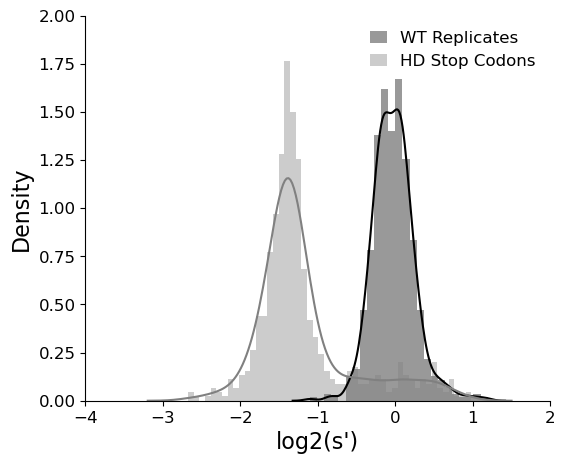

In [10]:
# Generate density plots of selection values for wtaav2 transfection
# Make overlaid density plots for: wild type and stop codon controls
set_2_colors = sns.color_palette("inferno")
REP5240_START = 225
WT = wtaav2_selection_aa_trans_df.query("is_wt_aa == 1").apply(np.log2).replace([np.inf, -np.inf], np.nan).dropna().values
helicase_stops = wtaav2_selection_aa_trans_df.query("(abs_pos > @REP5240_START) & (abs_pos < 536) & (aa == '*')").apply(np.log2).replace([np.inf, -np.inf], np.nan).dropna().values

fig = plt.figure(figsize=(6, 5), linewidth=5)
ax = plt.axes()
ax.set_facecolor('white')
g = sns.distplot(WT, bins=25, label='WT Replicates', color='black')
g = sns.distplot(helicase_stops, bins=50, label='HD Stop Codons', color='gray')

g.set_xlabel("log2(s')", fontsize=16)
g.set_ylabel("Density", fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
g.set_xlim((-4,2))
g.set_ylim((0,2))
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

plt.legend(frameon=False, columnspacing=1, handlelength=1, fontsize=12)
figname = 'density_plots_wtaav2_library_wt_stop_codon_controls.png'
save_fig(fig, figname, output_dir)

# perform mann whitney u test
stat, p_value = mannwhitneyu(WT, helicase_stops)
print('Statistics=%.2f, p=%.40f' % (stat, p_value))

plt.show()

Statistics=355528.00, p=0.0000000000000000000000000000000000000000


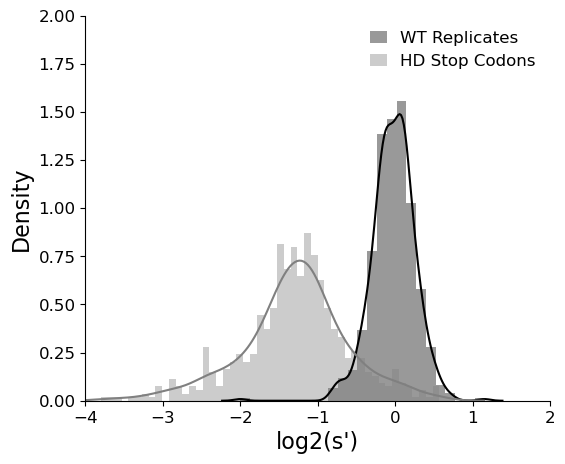

In [11]:
# Generate density plots of selection values for rep7868 transfection
# Make overlaid density plots for: wild type and stop codon controls
set_2_colors = sns.color_palette("inferno")
REP5240_START = 225
WT = rep7868_selection_aa_trans_df.query("is_wt_aa == 1").apply(np.log2).replace([np.inf, -np.inf], np.nan).dropna().values
helicase_stops = rep7868_selection_aa_trans_df.query("(abs_pos > @REP5240_START) & (abs_pos < 536) & (aa == '*')").apply(np.log2).replace([np.inf, -np.inf], np.nan).dropna().values

fig = plt.figure(figsize=(6, 5), linewidth=5)
ax = plt.axes()
ax.set_facecolor('white')
g = sns.distplot(WT, bins=25, label='WT Replicates', color='black')
g = sns.distplot(helicase_stops, bins=50, label='HD Stop Codons', color='gray')

g.set_xlabel("log2(s')", fontsize=16)
g.set_ylabel("Density", fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
g.set_xlim((-4,2))
g.set_ylim((0,2))
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

plt.legend(frameon=False, columnspacing=1, handlelength=1, fontsize=12)
figname = 'density_plots_rep7868_library_wt_stop_codon_controls.png'
save_fig(fig, figname, output_dir)

# perform mann whitney u test
stat, p_value = mannwhitneyu(WT, helicase_stops)
print('Statistics=%.2f, p=%.40f' % (stat, p_value))

plt.show()